In [1]:
!pip3 install tsnecuda==3.0.1+cu111 -f https://tsnecuda.isx.ai/tsnecuda_stable.html
!pip3 install mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://tsnecuda.isx.ai/tsnecuda_stable.html
     |████████████████████████████████| 80.4 MB 42 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from tsnecuda import TSNE
import mnist

In [3]:
!mkdir mnist
mnist.temporary_dir = lambda:'./mnist/'
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

X_train = train_images.reshape(-1,28*28)
X_test = test_images.reshape(-1,28*28)

print(X_train.shape)
print(train_labels.shape)
print(X_test.shape)
print(test_labels.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [4]:
X_embedded = TSNE(n_components=2, perplexity=15, learning_rate=10).fit_transform(X_train)

In [5]:
print(X_embedded.shape)

(60000, 2)


In [6]:
from sklearn.cluster import KMeans
kmeans_old = KMeans(n_clusters=10).fit(X_train)
kmeans_tsne = KMeans(n_clusters=10).fit(X_embedded)

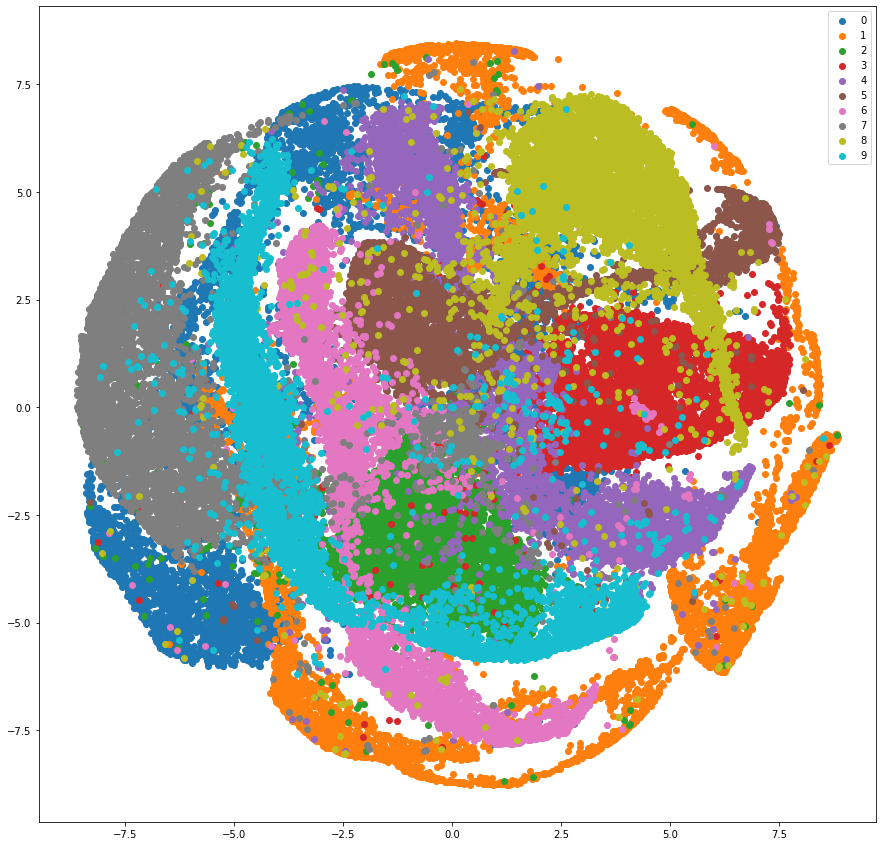

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
fig, ax = plt.subplots(figsize=(15,15))
Xs = X_embedded[:,0]
Ys = X_embedded[:,1]
for i in range(10):
  nums = np.where(train_labels == i)[0]
  ax.scatter(Xs[nums],Ys[nums], label = i)
ax.legend()

#plt.scatter(X_embedded[:,0], X_embedded[:,1], c = train_labels)

In [8]:
from sklearn.metrics import accuracy_score
print(f'Acc using all dims: {accuracy_score(kmeans_old.labels_, train_labels)}')
print(f'Acc using 2 dims: {accuracy_score(kmeans_tsne.labels_, train_labels)}')

Acc using all dims: 0.07741666666666666
Acc using 2 dims: 0.08978333333333334
